In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# II.23

In [ ]:
with np.load( 'data_noisy_image.npz') as data:
  A, C = data['A'], data['C']

A -> a

In [ ]:
def mat2vec (A):
  h, w = A.shape
  a = np.zeros(h*w, dtype = A.dtype )
  A = np.flipud ( A )
  for i , row in enumerate ( A ):
    a[ i * w : i * w + w ] = row
  return a

a -> A

In [ ]:
def vec2mat (a , shape ):
  h , w = shape
  A = np . zeros ( shape , dtype = a . dtype )
  for i in range ( h ):
    A [i , :] = a [ i * w : i * w + w ]
  return np . flipud ( A )

Находим a 

In [ ]:
np.shape(A)

(25, 60)

In [ ]:
a = mat2vec(A)
print(a)

[17.50407834 27.76836369 37.71668192 ... 49.90197451 38.16897991
 20.99752653]


In [ ]:
np.shape(a)

(1500,)

Задаем э

In [ ]:
dim = np.shape(a)
e = np.random.normal(loc=0.0, scale=1.0, size=dim)
print(e)

[ 1.24042749  0.59239894 -0.17922548 ...  0.53703675 -0.04390592
 -1.33821802]


Строим A

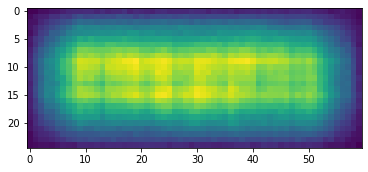

In [ ]:
plt.imshow(A);

Исследуем С

In [ ]:
m = C.shape
m

(1500, 816)

Задаем новое С - матрица с 2 на диагонали

In [ ]:
C_new = np.eye(C.shape[0])
C_new = 2 * C_new

Ищем a0: a = C * a0 + э

In [ ]:
a0 = np.linalg.inv(C_new) @ a.T
a0 -= np.linalg.inv(C_new) @ e.T

a0 -> A0

In [ ]:
A0 = vec2mat(a0, A.shape)
A0

array([[ 1.97068469,  3.58568141, 14.51976429, ..., 24.68246888,
        19.10644292, 11.16787228],
       [11.8517601 , 28.14871408, 37.99392917, ..., 31.10876768,
        22.09371748,  7.31925881],
       [21.86716273, 23.74853197, 48.14221957, ..., 49.23875443,
        30.48144438, 16.16859815],
       ...,
       [10.32383611, 34.35872524, 49.14512919, ..., 47.56715403,
        24.53596333, 17.24711197],
       [ 9.47519269, 25.94989173, 39.05488315, ..., 26.10904811,
        17.8175338 , 15.21330901],
       [ 8.13182543, 13.58798238, 18.9479537 , ..., 11.18857656,
        16.76966145, -1.33758939]])